## SVM Regression
Support Vector Machine (SVM) is an approach to data classification. By drawing a line or a hyperplane in the middle of data points, we can analyze how new data entries will behave depending on the position in the SVM model. The line/hyperplane is essentially the middle of the distance between two data points in different classes that are the closest. For the data regarding Suicidal Behaviors Among Adolescents, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('../../data/cleaned data/Suicidal Behaviours Among Adolescents.csv')
df = df.drop(['Country','Year','Sex'],axis=1)
df = df.dropna(how='any',axis=0) 
df = df.replace({'13-15':'1','16-17':'2'})
df = df.dropna()

In [2]:
df

,Age Group,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
4,1,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
5,1,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9
8,1,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4
9,1,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6
10,2,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,1,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,1,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,1,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,2,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


[Text(0.5, 0, 'Currently_Drink_Alcohol'), Text(0, 0.5, 'Attempted Suicide')]

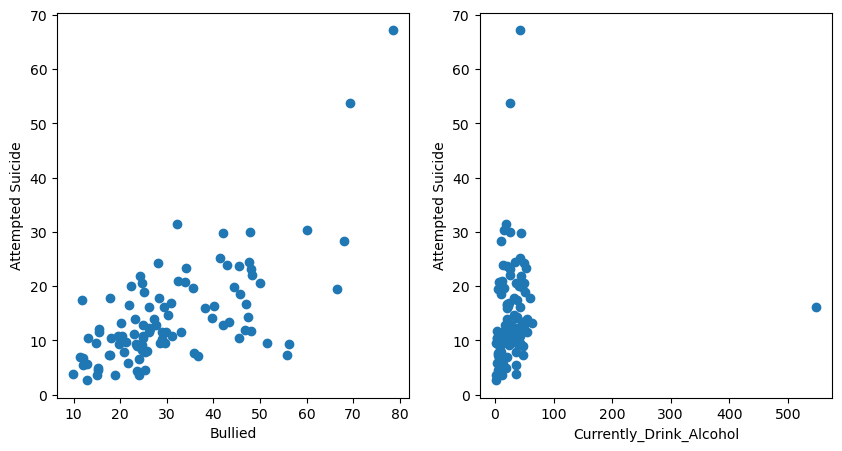

In [3]:
#data visualization

f, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.scatter(df['Bullied'],df['Attempted_suicide'])
ax1.set(xlabel = 'Bullied',ylabel = 'Attempted Suicide')

ax2.scatter(df['Currently_Drink_Alcohol'],df['Attempted_suicide'])
ax2.set(xlabel = 'Currently_Drink_Alcohol',ylabel = 'Attempted Suicide')


[Text(0.5, 0, 'No_close_friends'), Text(0, 0.5, 'Attempted Suicide')]

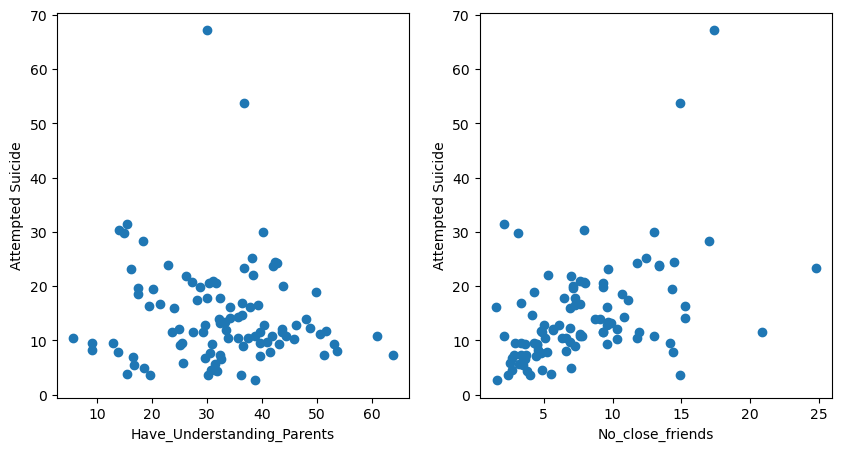

In [4]:
#data visualization

f, (ax3,ax4) = plt.subplots(1,2,figsize=(10,5))
ax3.scatter(df['Have_Understanding_Parents'],df['Attempted_suicide'])
ax3.set(xlabel = 'Have_Understanding_Parents',ylabel = 'Attempted Suicide')

ax4.scatter(df['No_close_friends'],df['Attempted_suicide'])
ax4.set(xlabel = 'No_close_friends',ylabel = 'Attempted Suicide')

Data visualization shows that the frequency of consuming alcohol isn't relevant to the count of attempted suicide. For young people, attempted suicide is significantly related to having understanding parents, whether they have close friends, and their experience with bullying.

In [5]:
#split dataset in features and target variable
#x = feature variables
#y = target variable

x = df['Attempted_suicide'].values
y = df['Age Group'].values
normalize = StandardScaler()
normalize.fit(x)
x= normalize.transform(x)

ValueError: Expected 2D array, got 1D array instead:
array=[12.9 18.9 14.4  9.6 13.4 14.1 10.9 10.3  9.7 14.   4.5  5.9  4.5  9.6
 12.3 20.1 12.1 24.3 11.6  8.  12.8 11.2  4.4  3.6  3.7  2.7 16.1 20.6
 13.2 21.8 29.8 31.5  4.9  6.9  3.8  5.5  6.6  7.4  5.7  6.7 11.5 16.5
  9.4 10.9  7.7 10.4  9.2 11.6  7.2  9.4 29.9 23.8 25.2 24.4  9.4 10.4
  7.4 11.7 12.  22.  24.  20.7 19.7 21.  67.2 53.7 19.8 20.5 13.9 17.8
  7.9 10.9 11.5 23.4 16.  12.8 11.5 10.5  9.6  8.2  9.5  7.8 10.4 17.9
 12.2 17.5 16.3  3.6  7.4 10.8 30.3 18.6 23.1 16.7 28.3 19.5 14.7 16.9
  9.  16.2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#split dataset into training set and testing set
#training set for learning
#testing set for predicting

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 3)
(20, 3)
(80,)
(20,)


#### Linear Regression

In [ ]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)

['2' '1' '2' '2' '1' '2' '2' '1' '2' '1' '1' '1' '1' '2' '1' '1' '2' '2'
 '2' '2']
[[5 7]
 [4 4]]
